In [1]:
#pip install pmdarima

**Importing Libraries**

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Packages / libraries
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# Increases the size of sns plots
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


import itertools
import datetime
from pandas import to_datetime
from datetime import datetime
import statsmodels.api as sm

%matplotlib inline

**Importing Dataset**

In [3]:
#################################################################################################################
########################################### Getting the CSV file     ############################################
#################################################################################################################

missing_values = ["n/a", "na", "--", "nan"]
# Loading the data
dataframe = pd.read_csv('https://raw.githubusercontent.com/mohsinziabutt/Applied-AI-Challenge-1/main/dataset/PT_Train.csv', parse_dates=['Timestamp (GMT)'], index_col=['Timestamp (GMT)'])

# print the shape
dataframe.shape

(226, 4)

**Exploratory Data Analysis**

**1. Checking null values**

In [4]:
dataframe.isnull().sum()

Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

**2. Describing data**

In [5]:
dataframe.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


**3. Redefining column names**

In [6]:
dataframe.columns = ['LHR','LRR','OS','OP']

**Plotting graph for initial dataset**

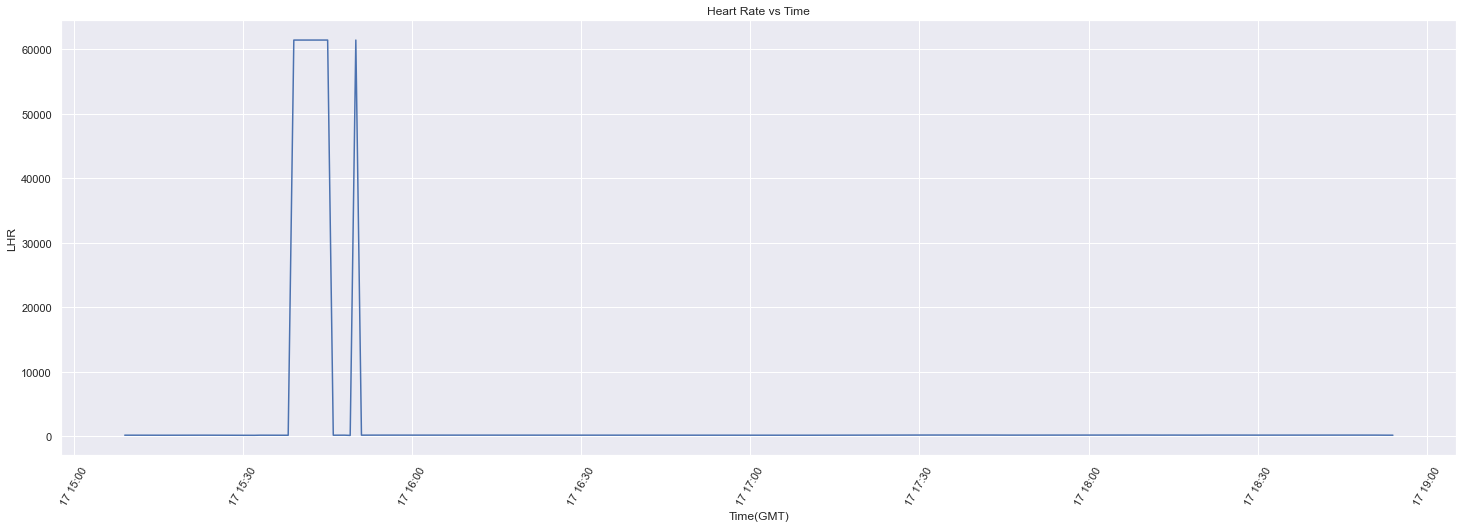

In [7]:
#xAxis = pd.to_datetime(dataframe['Time'])
#yAxis = dataframe['LHR']
plt.figure(figsize=(25,8))
plt.plot( dataframe['LHR'])
plt.title('Heart Rate vs Time')
plt.xlabel('Time(GMT)')
plt.xticks(rotation=60)
plt.ylabel('LHR')
plt.show()

**As we can see there are very high values in our dataset so we have to balance them first. for that we are going to take the mode of Lifetouch Heart Rate**

In [8]:
med = dataframe['LHR'].median()
print(med)

145.0


**Replacing the high values with the mode**

In [9]:
# Limiting the columns we need
df = dataframe[['LHR']]
df.loc[(df['LHR'] >= 300),'LHR'] = int(med)

df.describe()

,LHR
count,226.000000
mean,145.831858
std,11.130261
min,106.000000
25%,136.000000
50%,144.500000
75%,155.000000
max,172.000000


In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head(15)

,LHR
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
2015-08-17 15:14:00,132
2015-08-17 15:15:00,132
2015-08-17 15:16:00,133
2015-08-17 15:17:00,136


**Plotting the graph after removing high values**

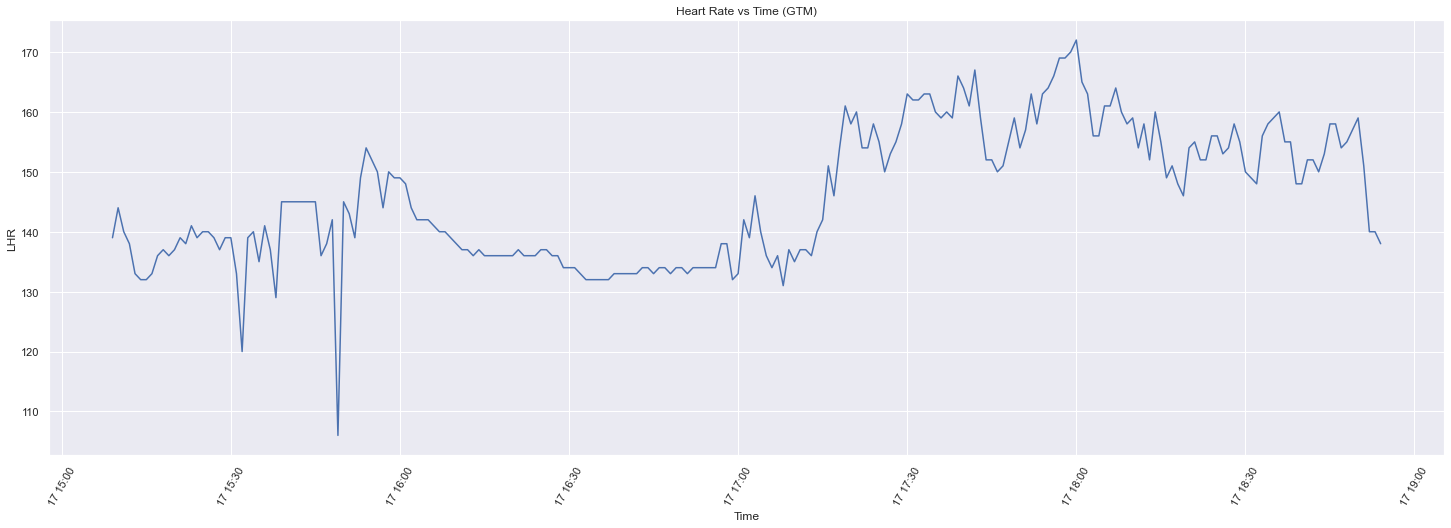

In [11]:
plt.figure(figsize=(25,8))
plt.plot(df)
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.ylabel('LHR')
plt.show()

**Plotting the dot graph after removing high values**

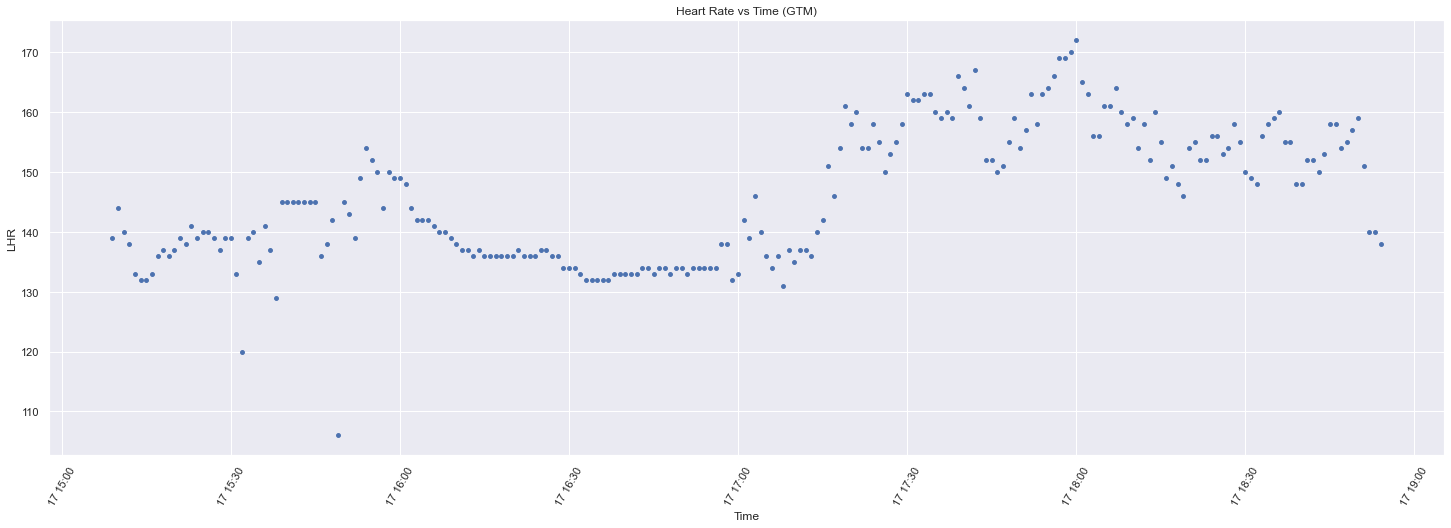

In [12]:
plt.figure(figsize=(25,8))
plt.scatter(df.index.values, df['LHR'], marker='o', s=15)
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.ylabel('LHR')
plt.show()

**As we see there are three values in the graph that are below 130. Lets replace them with the average value to balance the graph**

In [13]:
_mean = int(df["LHR"].mean())
df.loc[(df['LHR'] < 130),'LHR'] = _mean

**Plotting the graph after balancing the dataset**

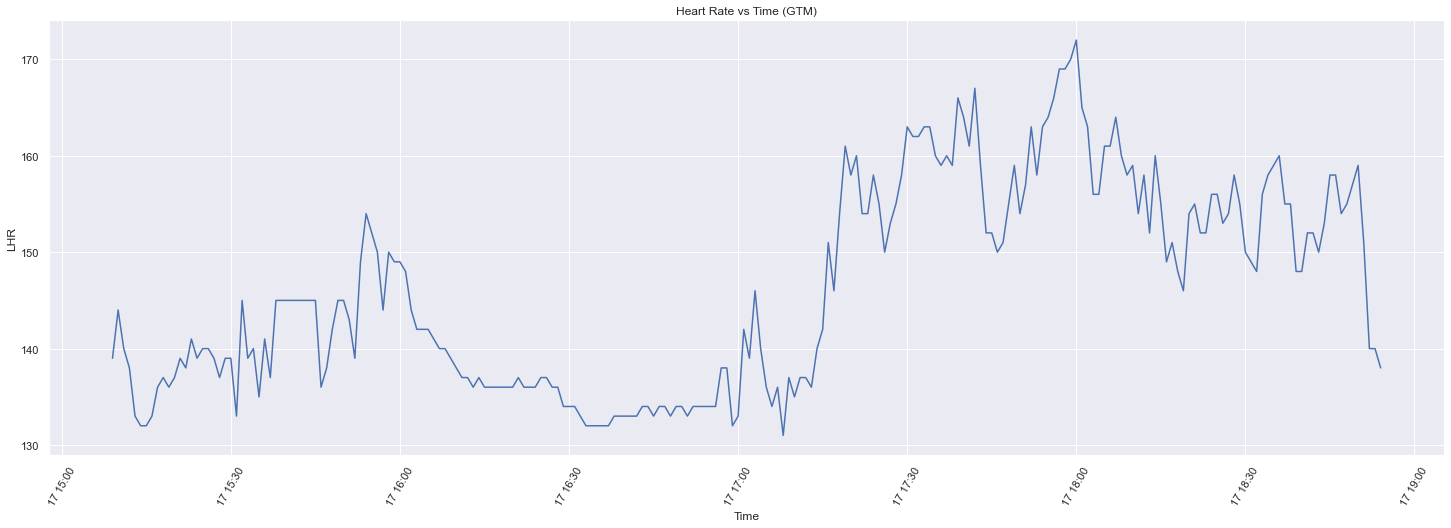

In [14]:
plt.figure(figsize=(25,8))
plt.plot(df)
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.ylabel('LHR')
plt.show()

**Let's check the stationarity of the series**

In [15]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
  # statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  # print(f'p value: {p_value}')
  # print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

  dfTest = adfuller(series, autolag='BIC')
  print("1. ADF : ", dfTest[0])
  print("2. P-Value : ", dfTest[1])
  print("3. Num of Lags : ", dfTest[2])
  print("4. Num of Observations : ", dfTest[3])
  print("5. Critical Values : ")

  for key, val in dfTest[4].items():
    print("\t", key, ":", val)

  print(f'Result: The series is {"not " if dfTest[1] > 0.05 else ""}stationary \n')

In [16]:
check_stationarity(df['LHR'])

1. ADF :  -2.554293691286055
2. P-Value :  0.10281648942972904
3. Num of Lags :  0
4. Num of Observations :  225
5. Critical Values : 
	 1% : -3.4597521044060353
	 5% : -2.874472927517147
	 10% : -2.5736628197530864
Result: The series is not stationary 



**As the series is not stationary so we will perfom 1st order differencing here**

In [17]:
df['D-LHR'] = df[['LHR']].diff(axis=0, periods=1)
df = df.dropna()
df.head(15)

,LHR,D-LHR
Timestamp (GMT),,
2015-08-17 15:10:00,144,5.0
2015-08-17 15:11:00,140,-4.0
2015-08-17 15:12:00,138,-2.0
2015-08-17 15:13:00,133,-5.0
2015-08-17 15:14:00,132,-1.0
2015-08-17 15:15:00,132,0.0
2015-08-17 15:16:00,133,1.0
2015-08-17 15:17:00,136,3.0
2015-08-17 15:18:00,137,1.0


**Plotting the graph for stationary time series**

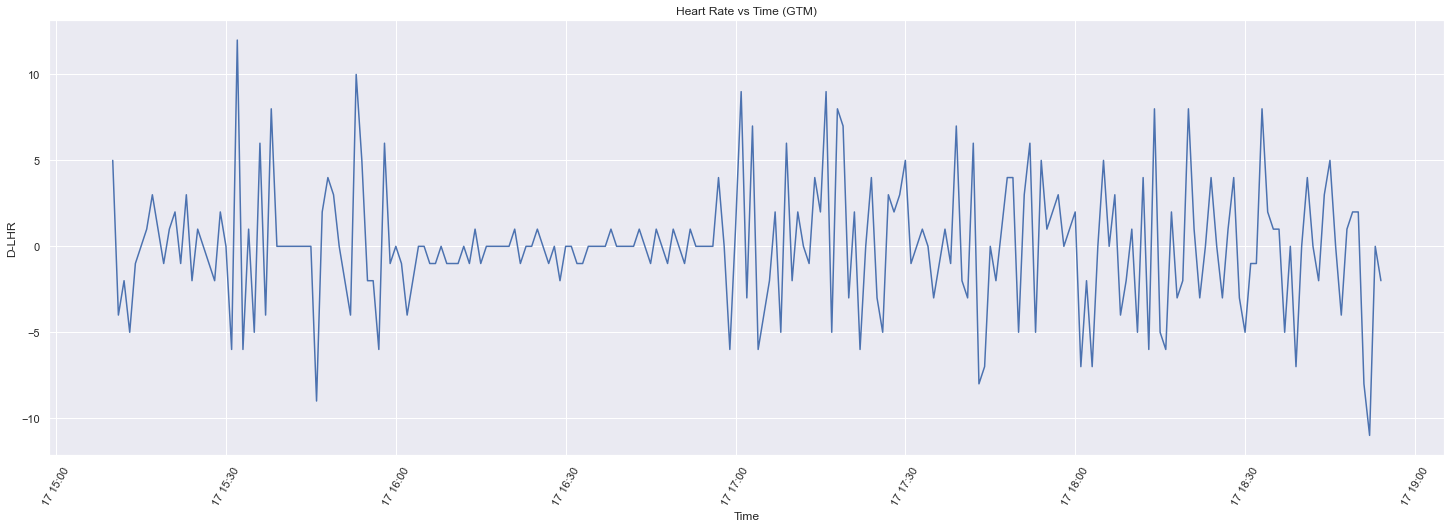

In [18]:
plt.figure(figsize=(25,8))
plt.plot(df['D-LHR'])
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.ylabel('D-LHR')
plt.show()

**Now the series seems pretty much stationary but let's check it through proper method**

In [19]:
check_stationarity(df['D-LHR'])

1. ADF :  -17.74110542887784
2. P-Value :  3.401867257463206e-30
3. Num of Lags :  0
4. Num of Observations :  224
5. Critical Values : 
	 1% : -3.459884913337196
	 5% : -2.8745310704320794
	 10% : -2.573693840082908
Result: The series is stationary 



**Splittig the Differneced Data into test and train data**

In [20]:
new_df = df['D-LHR']

split = len(new_df) - int(0.2*len(new_df))
print(f'Use {split} rows for training data')
print(f'Use {len(new_df) - split} rows for testiing data')
train = new_df[0:split]
test = new_df[split:]


print('Ttrain Data Shape', train.shape)
print('Test Data Shape', test.shape)

Use 180 rows for training data
Use 45 rows for testiing data
Ttrain Data Shape (180,)
Test Data Shape (45,)


**Plotting graph for training and testing data**

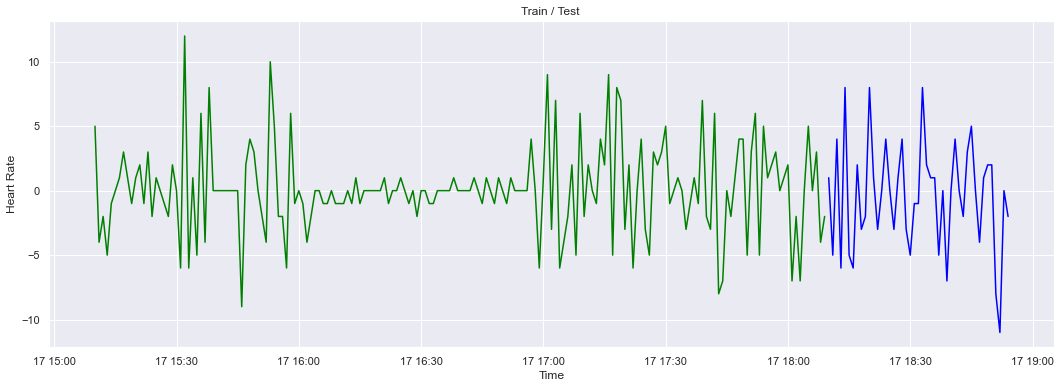

In [21]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "green")
plt.plot(test, color = "blue")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Train / Test ")
plt.show()

**finding 'q' for model using ACF plot**

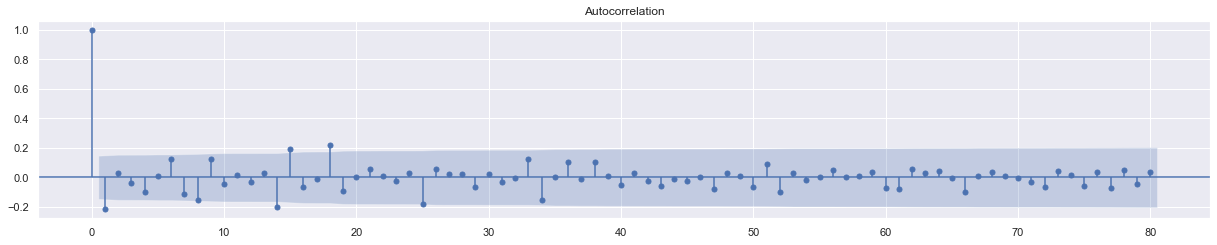

In [22]:
fig = plt.figure(figsize=(21,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=80, ax=ax1)

**finding 'p' for model using PACF plot**

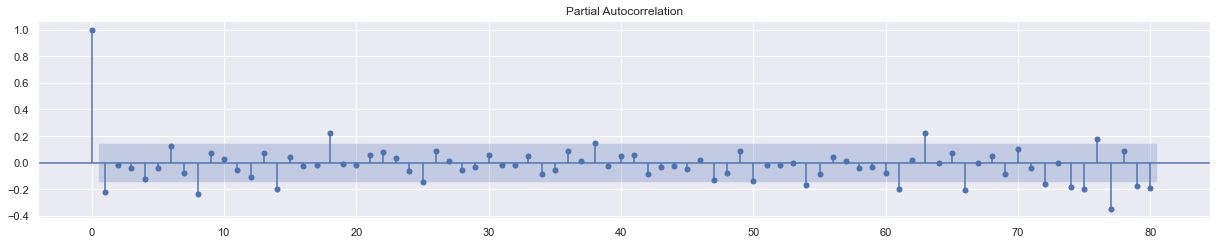

In [23]:
fig = plt.figure(figsize=(21,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(train, lags=80, ax=ax1)

**Finding the best value for ARIMA and training the model on the best values i.e. (19, 1, 18)**

In [24]:
warnings.filterwarnings('ignore')

arima = sm.tsa.arima.ARIMA(train, order = (19,1,18))
arima_fit = arima.fit()

forecast = arima_fit.predict(start = len(train), end = test.index[-1])

**Printing forecasted values**

In [25]:
print("Total Forecast Values", len(forecast), "\n")
print(forecast)

Total Forecast Values 45 

2015-08-17 18:10:00    2.605428
2015-08-17 18:11:00    0.653322
2015-08-17 18:12:00    0.315075
2015-08-17 18:13:00   -0.297177
2015-08-17 18:14:00   -0.267891
2015-08-17 18:15:00    4.691541
2015-08-17 18:16:00   -1.731189
2015-08-17 18:17:00    1.811644
2015-08-17 18:18:00    0.133450
2015-08-17 18:19:00   -3.950200
2015-08-17 18:20:00    0.636356
2015-08-17 18:21:00   -3.491013
2015-08-17 18:22:00   -0.979674
2015-08-17 18:23:00   -0.778489
2015-08-17 18:24:00   -2.147960
2015-08-17 18:25:00    1.169014
2015-08-17 18:26:00    1.649975
2015-08-17 18:27:00    0.102944
2015-08-17 18:28:00    3.086503
2015-08-17 18:29:00   -0.901122
2015-08-17 18:30:00    1.994335
2015-08-17 18:31:00   -1.325308
2015-08-17 18:32:00    2.152614
2015-08-17 18:33:00    2.354219
2015-08-17 18:34:00   -1.228054
2015-08-17 18:35:00    1.349897
2015-08-17 18:36:00    0.431678
2015-08-17 18:37:00    0.267185
2015-08-17 18:38:00    0.958542
2015-08-17 18:39:00   -3.422829
2015-08-17 18

**Reverting the differenced forecasted values into normal values**

In [26]:
split = len(df) - int(0.2*len(df))
test_orignal = df[split:]

x = []
reverse_value = test + test_orignal['LHR'].shift(-1)
x.append(reverse_value)
reverted_forecast = pd.concat(x, axis=1)

reverted_forecast

,0
Timestamp (GMT),
2015-08-17 18:10:00,155.0
2015-08-17 18:11:00,153.0
2015-08-17 18:12:00,156.0
2015-08-17 18:13:00,154.0
2015-08-17 18:14:00,163.0
2015-08-17 18:15:00,144.0
2015-08-17 18:16:00,145.0
2015-08-17 18:17:00,150.0
2015-08-17 18:18:00,143.0


**Checking RMSE and AIC**

In [27]:
from numpy import sqrt

aic = arima_fit.aic

# 'squared=False' mean take square root using mean_squared_error method
rms_error = mean_squared_error(test.values, forecast.values, squared=False)

print("Akaike's Information Criterion (AIC): " + str(aic), "\nRoot Mean Square Error (RMSE): " + str(rms_error))

Akaike's Information Criterion (AIC): 961.0609256031742 
Root Mean Square Error (RMSE): 4.478436242732384


**Plotting the graph to verify forecasted values against testing data**

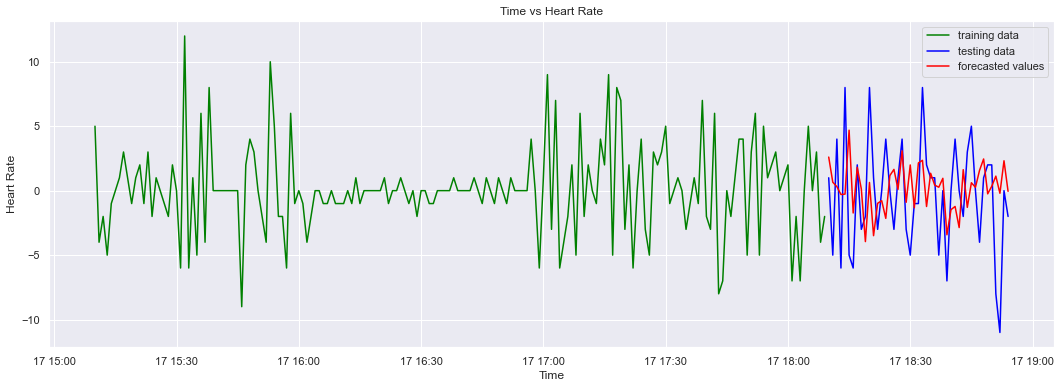

In [28]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "green", label="training data")
plt.plot(test, color = "blue", label="testing data")
plt.plot(forecast, color = "red", label="forecasted values")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

**Predicting the next 20 values using the model we trained**

In [29]:
prediction = arima_fit.predict(start = len(df['LHR']), end = len(df['LHR']) + 19)

In [30]:
print("Total Predictions" ,len(prediction), "\n")
print(prediction)

Total Predictions 20 

2015-08-17 18:55:00    1.019135
2015-08-17 18:56:00    0.549416
2015-08-17 18:57:00   -2.172490
2015-08-17 18:58:00    1.144659
2015-08-17 18:59:00   -1.417173
2015-08-17 19:00:00   -2.148669
2015-08-17 19:01:00   -1.588709
2015-08-17 19:02:00   -1.606464
2015-08-17 19:03:00    0.524708
2015-08-17 19:04:00    0.298129
2015-08-17 19:05:00    0.250371
2015-08-17 19:06:00    1.797922
2015-08-17 19:07:00   -0.439228
2015-08-17 19:08:00    1.716907
2015-08-17 19:09:00    0.981800
2015-08-17 19:10:00    0.896071
2015-08-17 19:11:00    0.745241
2015-08-17 19:12:00   -1.054729
2015-08-17 19:13:00    1.881955
2015-08-17 19:14:00    1.267505
Freq: T, Name: predicted_mean, dtype: float64


**Plotting graph for predicted values along with previous data**

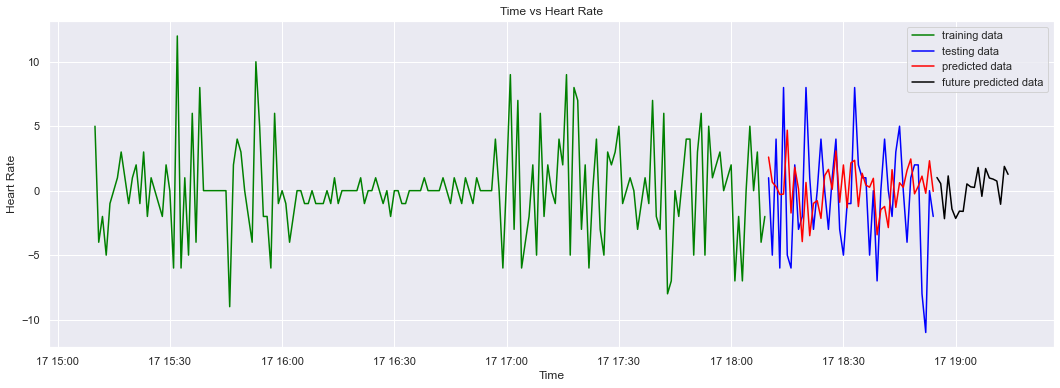

In [31]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "green", label="training data")
plt.plot(test, color = "blue", label="testing data")
plt.plot(forecast, color = "red", label="predicted data")
plt.plot(prediction, color = "black", label="future predicted data")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

**Reverting the differenced training and testing data into normal**

In [32]:
x = []
reverse_value = df['LHR'] + df['D-LHR'].shift(-1)
x.append(reverse_value)
df['I-LHR'] = pd.concat(x, axis=1)

df

,LHR,D-LHR,I-LHR
Timestamp (GMT),,,
2015-08-17 15:10:00,144,5.0,140.0
2015-08-17 15:11:00,140,-4.0,138.0
2015-08-17 15:12:00,138,-2.0,133.0
2015-08-17 15:13:00,133,-5.0,132.0
2015-08-17 15:14:00,132,-1.0,132.0
2015-08-17 15:15:00,132,0.0,133.0
2015-08-17 15:16:00,133,1.0,136.0
2015-08-17 15:17:00,136,3.0,137.0
2015-08-17 15:18:00,137,1.0,136.0


**Reverting the predicted data from differenced values to normal**

In [33]:
reverted_pred = np.hstack((df['LHR'][0], prediction)).cumsum()
reverted_pred = reverted_pred.round(0).astype(int)

print("Total Conversions", len(reverted_pred), "\n")
print(reverted_pred)

Total Conversions 21 

[144 145 146 143 145 143 141 139 138 138 139 139 141 140 142 143 144 145
 143 145 147]


**Droping the first index**

In [34]:
reverted_pred = np.delete(reverted_pred, 0)
print("Total Conversions", len(reverted_pred), "\n")
print(reverted_pred)

Total Conversions 20 

[145 146 143 145 143 141 139 138 138 139 139 141 140 142 143 144 145 143
 145 147]


**Plotting graph for reverted dataset against actual dataset**

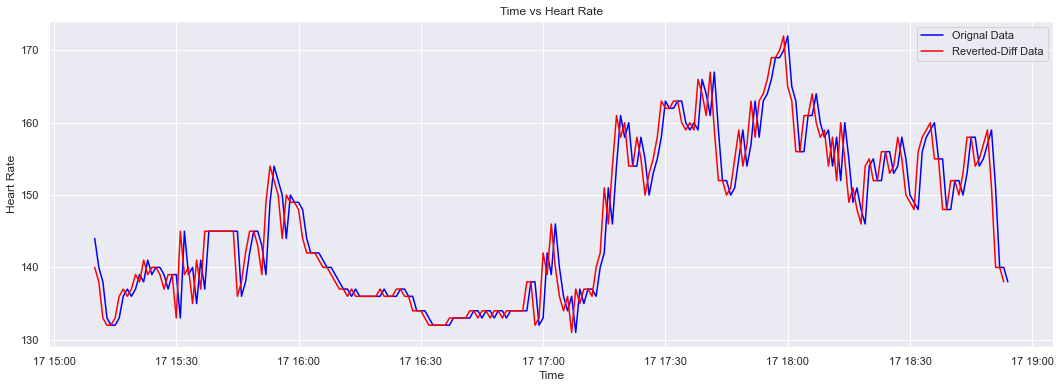

In [35]:
plt.figure(figsize=(18, 6))
plt.plot(df['LHR'], color = "blue", label="Orignal Data")
plt.plot(df['I-LHR'], color = "red", label="Reverted-Diff Data")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

**Plotting graph for reverted forecasted values**

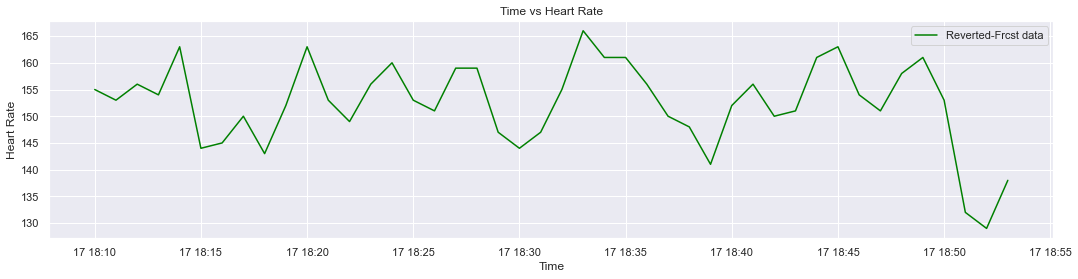

In [36]:
plt.figure(figsize=(18, 4))
plt.plot(reverted_forecast, color = "green", label="Reverted-Frcst data")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

**Converting predicted values into dataframe**

In [37]:
new_df = pd.DataFrame([], columns=['Timestamp (GMT)', 'Pred-LHR'])

new_df['Pred-LHR'] = reverted_pred
new_df['Timestamp (GMT)'] = prediction.index
new_df.set_index('Timestamp (GMT)', inplace=True)

**Plotting graph for reverted predicted values**

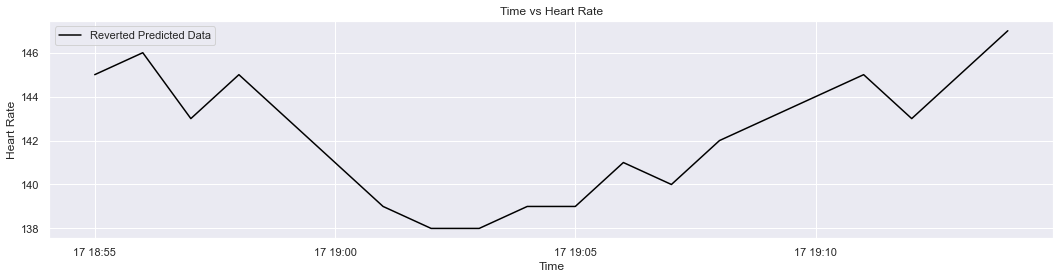

In [38]:
plt.figure(figsize=(18, 4))
plt.plot(new_df, color = "black", label="Reverted Predicted Data")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

**Plotting graph to finalize the results**

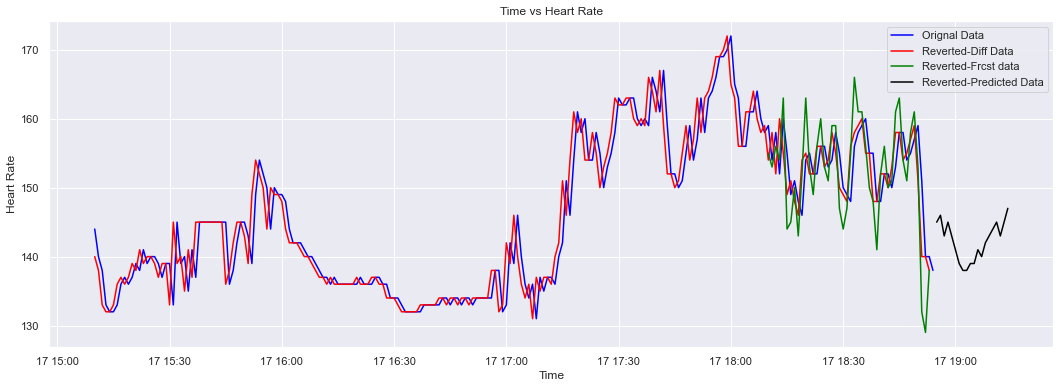

In [41]:
plt.figure(figsize=(18, 6))
plt.plot(df['LHR'], color = "blue", label="Orignal Data")
plt.plot(df['I-LHR'], color = "red", label="Reverted-Diff Data")
plt.plot(reverted_forecast, color = "green", label="Reverted-Frcst data")
plt.plot(new_df, color = "black", label="Reverted-Predicted Data")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

In [40]:
new_df.to_csv('New_LHR_Predictions.csv', header=True)